<a href="https://colab.research.google.com/github/Susandeepganta/Tensorflow_classification_neural_network_FASHION_MNIST/blob/main/02_tensorflow_classification_neural_network_FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to nueral network classification with TensorFlow

In this notebook we're going to learn how to write networks for classification problem. 

A classification is where you try to classify something as one thing or another.
* Binary classification.
* Multiclass classification.
* Multilabel classification. 

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples=1000

# Create Circles
X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles= pd.DataFrame({'X0': X[:,0],"X1":X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


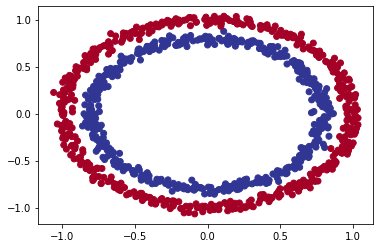

In [ ]:
# Visualize with the plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

# Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Steps in modeling

In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model= tf.keras.Sequential([
 tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

# 3. Fit the model
model.fit(X,y, epochs= 5)



Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Let's try and improve the model by running it for a longer time
model.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4890
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

Since we're working on a binary classification problwm and our meodl is getting around ~ 50% accuracy... it's performing as if its guessing. 

So let's step things up a notch and add a extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2= tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model_2
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X,y, epochs=100, verbose=0)

# 4. Evaluate the model_2
model_2.evaluate(X,y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

# Improving our model

Let's look into our bag of tricks ato see how we can improve our model.
1. **Create a model**- we might have to add more layers or increase the number of hidden units within a layer.
2. **Compiling a model**- here we might have to choose a different optimization function such as Adam instead of SGD.
3. **Fitting a model** - perhaps we might fot our model for more epochs( leave it to train for a longer time). 

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3= tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# 2. Compile the model_3
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X,y, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X,y )

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]


# To Visualize our model's preidcitions, let's create a function "plot_decision_function"
* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* make predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [ ]:
def plot_decision_boundary(model,X,y):
  """
  plot the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid. 
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1  # Defining the boundaries of X- axis
  y_min, y_max= X[:,0].min()-0.1, X[:,0].max() + 0.1     # Defining the boundaries of y- axis
  xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                       np.linspace(y_min,y_max,100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred= np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred, cmap= plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap= plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


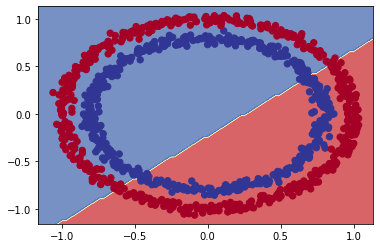

In [ ]:
plot_decision_boundary(model= model_3,
                       X=X,
                       y=y)

# The missing-piece is Non-Linearity

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4= tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid' ),
])

# 2. Compile the model_4
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_4.fit(X,y, epochs=100, verbose=0)

# 4. Evaluate the model
model_4.evaluate(X,y )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification


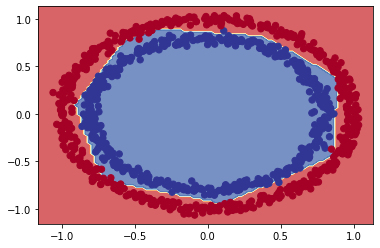

In [ ]:
plot_decision_boundary(model_4,X,y)

In [ ]:
# Create a toy tensor( similar to the data we pass into our models )
A= tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

# Evaluating and improving our Classification model

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train,y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the tesing data.

# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5= tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid' ),
])

# 2. Compile the model_5
model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history= model_5.fit(X_train,y_train, epochs=25, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

# 4. Evaluate the model
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


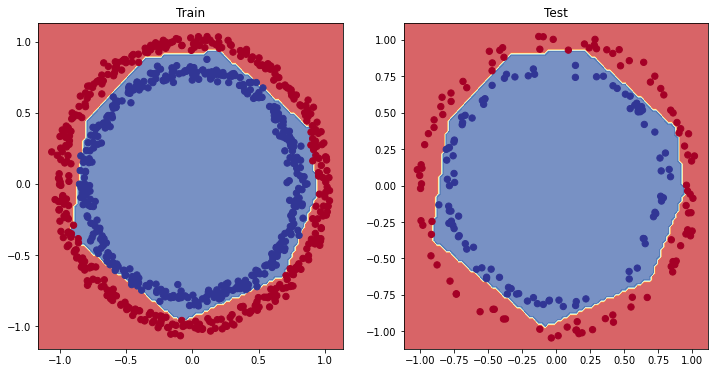

In [ ]:
# Plot the decision boundaries for both test and train model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test)

## Plot the loss(or training loss)

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_5 loss curves')

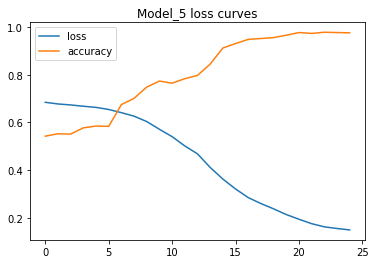

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_5 loss curves")

**Note** : For many problems, the loss function going down means the model is improving (the predictions it's making are getting closed to the ground labels.)

In [ ]:
# Let's try using a higher "ideal" learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7= tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

# 2. Compile the model
model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])

# 3. Fit the model
history_3= model_7.fit(X_train,y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/25
25/25 [===========

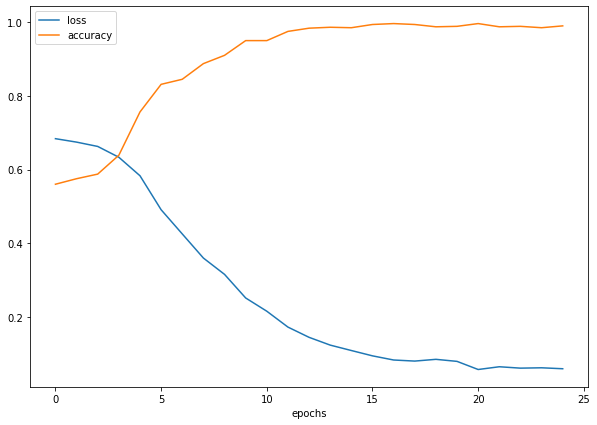

In [ ]:
# Plotting the loss and accuracy curve
pd.DataFrame(history_3.history).plot(figsize=(10,7), xlabel='epochs');

In [ ]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9900


[0.046285759657621384, 0.9900000095367432]

doing binary classification
doing binary classification


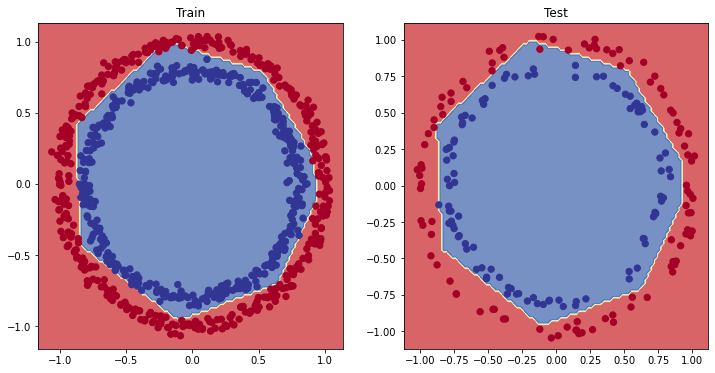

In [ ]:
# Plot the decision boundaries for the training and test data sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X_test, y_test)
plt.show()

In [ ]:
 # Check the accuracy of the model
loss, accuracy= model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9900
Model loss on the test set: 0.046285759657621384
Model accuracy on the test set: 99.00%


How about a confusion matrix?

In [ ]:
# create the confusion matrix 
from sklearn.metrics import confusion_matrix

# Predict the output
y_pred = model_7.predict(X_test)

# Converting the probabilities to binary numbers
tf.round(y_pred)

# Confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[100,   1],
       [  1,  98]])

How about we prettify our confusion matrix?

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  #set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


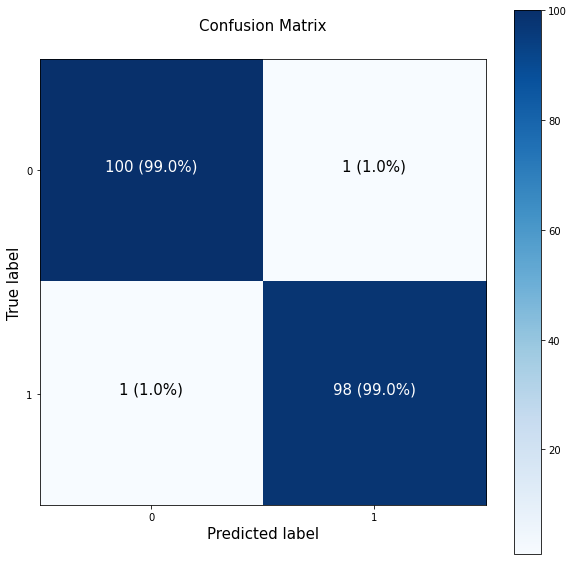

In [ ]:
make_confusion_matrix(y_test,y_pred)

## Working with a larger example(Multiclass classification)

* When you have more than two classes as an option, it's known as **multi-class classification**.
* It also means if you have 100 different classes, it's multi-class classification. 


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training sample: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_data[0].shape

((28, 28), (28, 28))

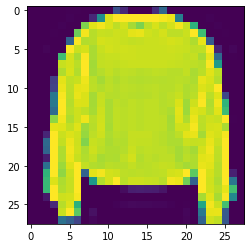

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt 
plt.imshow(train_data[7])

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_name=['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

len(class_name)

10

Text(0.5, 1.0, 'T-shirt/top')

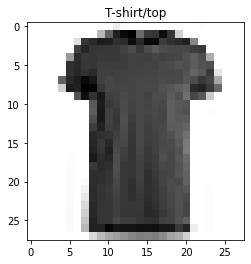

In [ ]:
# Plot an example image and its label
index_of_choice= 17
plt.imshow(train_data[index_of_choice],cmap= plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

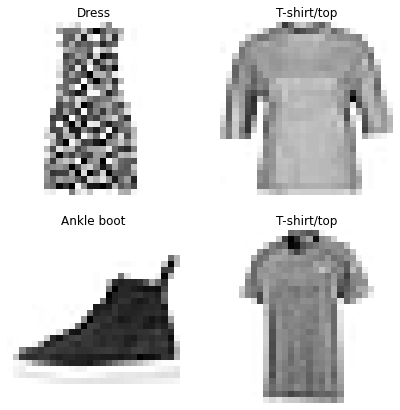

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax= plt.subplot(2,2,i+1) # Define 4 subplots
  rand_index= random.choice(range(len(train_data))) # generating random index number
  plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)



In [ ]:
class_name[train_labels[0]]

'Ankle boot'

In [ ]:
train_labels[0]

9

# Create a model

In [ ]:
# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_8.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
non_norm_history= model_8.fit(train_data, 
                              train_labels,
                              epochs=10,
                              validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# Check the mina nd max values of the trinaing data
train_data.max(), train_data.min()

(255, 0)

`
Neural networks perfer to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.
`

In [ ]:
# We can get out training and testing data netween 0 & 1 by dividing by the maximum
train_data_norm= train_data/255.0
test_data_norm = test_data/255.0

In [ ]:
# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_9.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
norm_history= model_9.fit(train_data_norm, 
                              train_labels,
                              epochs=10,
                              validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

✅**Note**: Neural networks tend to preder data in numerical form as well as scaled/normalized( number between 0 & 1).

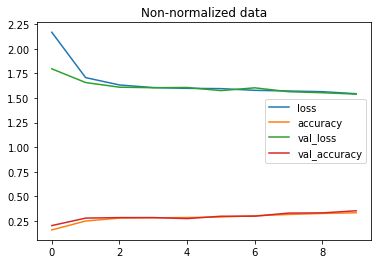

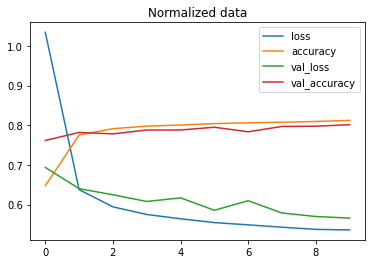

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

## Evaluating our multi_class model

To evaluate out mulit-class classification model we could:
* Evalaute its performance using other classification metrics(such as confusion matrix).
* Assess some of its prediction (through visualizations).
* Improve its results (by training it for longer or changing the architecture). 

In [ ]:
# Make some predictions with our model
y_probs = model_10.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]


array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

✅ **Note**: Remember to make predictions onthe the same kinf of data your model was trianed on (e.g. if your model was trianed on normalized data, you'll want to make predictions on normalized data). 


In [ ]:
# Convert all the probabilities into integers
y_preds= y_probs.argmax(axis=1)

# View the forst 10 predictions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# Get the accuracy score
loss, accuracy= model_10.evaluate(test_data_norm, y_preds)
loss, accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.2531 - accuracy: 1.0000


(0.25306636095046997, 1.0)

In [ ]:
loss, accuracy= model_10.evaluate(test_data_norm, test_labels)
loss, accuracy

313/313 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.8075


(0.5659515261650085, 0.8075000047683716)

**✅Note**: Often when working with images and other forms of visual data, it;s a good idea to visualize as much as possible to develop a further understanding of the daa and the inputs and outputs of your models.

How about we create a fun funtion for:
* Plot a random image
* Make a prediction on said image.
* Label the plot with the truth label & the predicted label. 

In [ ]:
import random 
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truthh label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image= images[i]
  pred_probs= model.predict(target_image.reshape(1,28,28))  # Gives probability number between 0 & 1.
  pred_label= classes[pred_probs.argmax()] # Finding the probability with maximum value
  true_label= classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong 
  if pred_label == true_label:
    color= "green" 
  else:
    color= "red"

  # Add Xlabel information(prediction / true label)
  plt.xlabel("Pred: {} {:2.0f}% (True : {})".format(pred_label, 100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)
  #reduce_max() is used to find the max value across a tensor


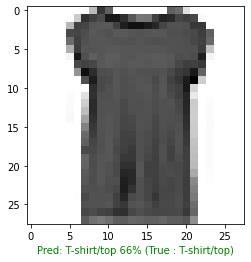

In [ ]:
plot_random_image(model= model_10,
                  images= test_data_norm,
                  true_labels=test_labels,
                  classes= class_name)